In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2025-04-08 12:01:50.937902


Getting the Data

In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-04-08 12:01:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.208.219, 142.250.203.155, 142.250.75.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.208.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.7MB/s    in 5.1s    

2025-04-08 12:01:56 (20.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
import os

3# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [4]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [5]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [6]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off") # Turn off axis
    print(f"Image shape: {img.shape}") # Show the shape of the image
    return img

Image shape: (512, 512, 3)


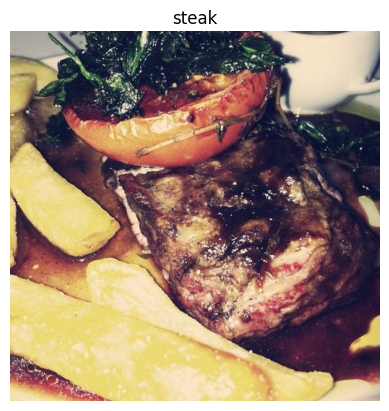

In [7]:
# View random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [8]:
# View the img (actually just a big array/tensor)
img

array([[[164, 166, 155],
        [162, 164, 153],
        [161, 161, 151],
        ...,
        [163, 164, 158],
        [155, 156, 151],
        [149, 150, 145]],

       [[162, 164, 153],
        [162, 164, 153],
        [162, 162, 152],
        ...,
        [162, 163, 157],
        [154, 155, 150],
        [148, 149, 144]],

       [[159, 161, 150],
        [160, 162, 151],
        [163, 163, 153],
        ...,
        [160, 161, 155],
        [153, 154, 149],
        [147, 148, 143]],

       ...,

       [[241, 218, 168],
        [242, 219, 169],
        [244, 221, 171],
        ...,
        [188, 163, 143],
        [188, 163, 143],
        [189, 164, 144]],

       [[240, 214, 163],
        [241, 215, 164],
        [243, 217, 166],
        ...,
        [193, 168, 146],
        [197, 172, 150],
        [201, 176, 154]],

       [[238, 213, 159],
        [239, 214, 160],
        [240, 214, 163],
        ...,
        [201, 176, 154],
        [210, 185, 163],
        [217, 192, 170]]

In [9]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

In [10]:
img/255

array([[[0.64313725, 0.65098039, 0.60784314],
        [0.63529412, 0.64313725, 0.6       ],
        [0.63137255, 0.63137255, 0.59215686],
        ...,
        [0.63921569, 0.64313725, 0.61960784],
        [0.60784314, 0.61176471, 0.59215686],
        [0.58431373, 0.58823529, 0.56862745]],

       [[0.63529412, 0.64313725, 0.6       ],
        [0.63529412, 0.64313725, 0.6       ],
        [0.63529412, 0.63529412, 0.59607843],
        ...,
        [0.63529412, 0.63921569, 0.61568627],
        [0.60392157, 0.60784314, 0.58823529],
        [0.58039216, 0.58431373, 0.56470588]],

       [[0.62352941, 0.63137255, 0.58823529],
        [0.62745098, 0.63529412, 0.59215686],
        [0.63921569, 0.63921569, 0.6       ],
        ...,
        [0.62745098, 0.63137255, 0.60784314],
        [0.6       , 0.60392157, 0.58431373],
        [0.57647059, 0.58039216, 0.56078431]],

       ...,

       [[0.94509804, 0.85490196, 0.65882353],
        [0.94901961, 0.85882353, 0.6627451 ],
        [0.95686275, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocessing data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)  

#Set up the train and test directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        verbose = 0)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

<Axes: title={'center': 'Non-normalized Data'}>

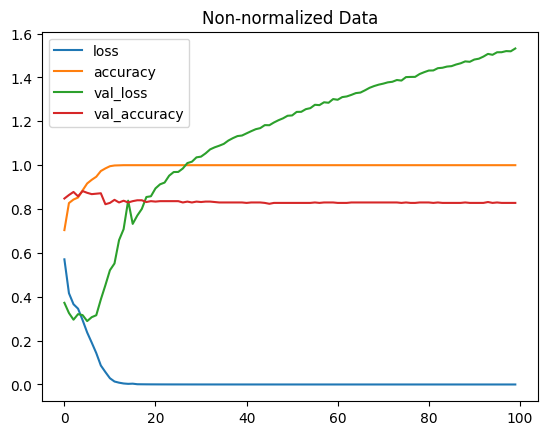

In [23]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history_1.history).plot(title="Non-normalized Data")

In [20]:
# Check out the layers in our model
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
 1/47 [..............................] - ETA: 37s - loss: 0.6885 - accuracy: 0.5938

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

47/47 [==============================] - 3s 58ms/step - loss: 1.5784 - accuracy: 0.6247 - val_loss: 0.6371 - val_accuracy: 0.6080
Epoch 2/5
47/47 [==============================] - 3s 54ms/step - loss: 0.6370 - accuracy: 0.5793 - val_loss: 0.6319 - val_accuracy: 0.6860
Epoch 3/5
47/47 [==============================] - 3s 58ms/step - loss: 0.6332 - accuracy: 0.6893 - val_loss: 0.6292 - val_accuracy: 0.6920
Epoch 4/5
47/47 [==============================] - 3s 58ms/step - loss: 0.6128 - accuracy: 0.7113 - val_loss: 0.6005 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 3s 55ms/step - loss: 0.6168 - accuracy: 0.6367 - val_loss: 0.5949 - val_accuracy: 0.5540


In [22]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_9 (Dense)             (None, 4)                 602116    
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
